<a href="https://colab.research.google.com/github/RakhaFS/Statisika-Multivariat/blob/main/MANOVA_Rakha_Farras_Syaddad_11210940000077.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

21-5-2025, 5:38AM

Rakha Farras Syaddad
11210940000077

Sebuah sekolah mencoba sebuah kurikulum pembelajaran dengan evaluasi berupa Penilaian Harian sebanyak 4 kali. Sampel dari percobaan ini adalah 10 siswa kelas 5 dengan melihat 5 mata pelajaran yaitu Bahasa Indonesia, IPA, IPS, Matematika, dan Seni Budaya dan Prakarya (SBDP). Pembagian materinya adalah sebagai berikut:

*   PH 1 berisi materi mengulang sedikit materi di akhir kelas 4 dan sebagian materi awal kelas 5 dengan perbandingan 50:50.
*   PH 2 berisi materi lanjutan untuk kelas 5 di semester 1.
*   PH 3 berisi materi lanjutan untuk kelas 5 di semster 2.
*   PH 4 berisi materi akhir kelas 5 dan di sisipkan materi kelas 6 sebagai jembatan menuju kelas 6 dengan perbandingan 50:50.

Sekolah ingin melihat apakah kurikulum ini sudah sesuai dengan kemampuan siswa dan pengajar.




#Modul (import dan Install)

In [ ]:
#install modul
!pip install pingouin

In [ ]:
#import modul
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.multivariate.manova import MANOVA

#Data

In [ ]:
#baca data
data = pd.read_excel('Nilai Kelas V.xlsx')
data

,PH,Bindo,IPA,IPS,MTK,SBDP
0,PH1,91,80,85,84,87
1,PH1,86,86,88,83,90
2,PH1,95,90,86,91,90
3,PH1,93,87,93,83,87
4,PH1,82,84,83,86,83
5,PH1,93,82,94,82,84
6,PH1,90,85,85,94,80
7,PH1,91,95,85,87,91
8,PH1,85,90,93,81,94
9,PH1,90,82,94,84,85


In [ ]:
Variabel = data['PH'].unique()
Variabel

array(['PH1', 'PH2', 'PH3', 'PH4'], dtype=object)

In [ ]:
jumlah_per_metode = data["PH"].value_counts()

# Tampilkan hasil
print(jumlah_per_metode)

PH
PH1    10
PH2    10
PH3    10
PH4    10
Name: count, dtype: int64


#Uji Normalitas

In [ ]:
from typing_extensions import dataclass_transform
#Uji Normalitas
data_A = data.loc[data['PH']=='PH1', ['Bindo', 'IPA', 'IPS', 'MTK', 'SBDP']]
data_B = data.loc[data['PH']=='PH2', ['Bindo', 'IPA', 'IPS', 'MTK', 'SBDP']]
data_C = data.loc[data['PH']=='PH3', ['Bindo', 'IPA', 'IPS', 'MTK', 'SBDP']]
data_D = data.loc[data['PH']=='PH4', ['Bindo', 'IPA', 'IPS', 'MTK', 'SBDP']]
#lanjutin
print('Uji Normalitas:')
print('PH1: ',pg.multivariate_normality(data_A, alpha=0.05) )
print('PH2: ',pg.multivariate_normality(data_B, alpha=0.05) )
print('PH3: ',pg.multivariate_normality(data_C, alpha=0.05) )
print('PH4: ',pg.multivariate_normality(data_D, alpha=0.05) )

Uji Normalitas:
PH1:  HZResults(hz=np.float64(7.249355155357056), pval=np.float64(3.061031294525818e-90), normal=False)
PH2:  HZResults(hz=np.float64(7.249355155357056), pval=np.float64(3.061031294525818e-90), normal=False)
PH3:  HZResults(hz=np.float64(7.249355155357056), pval=np.float64(3.061031294525818e-90), normal=False)
PH4:  HZResults(hz=np.float64(7.249355155357056), pval=np.float64(3.061031294525818e-90), normal=False)


Belum ada yg berdistribusi normal, berarti lanjut transformasi

Jika data tidak berdistribusi normal lakukan Transformasi\
data_A_trans = np.sqrt(data_A) #dst\
atau pake ini:\
data_A_trans = np.log(data_A)\
PILIH SALAH SATU AJA\
setelah itu uji normalitas lagi

In [ ]:
#Jika data tidak berdistribusi normal lakukan Transformasi
data_A_trans = np.sqrt(data_A)
data_B_trans = np.sqrt(data_B)
data_C_trans = np.sqrt(data_C)
data_D_trans = np.sqrt(data_D)

In [ ]:
print('Uji Normalitas Setelah Transformasi:')
print('PH1: ',pg.multivariate_normality(data_A_trans, alpha=0.05) )
print('PH2: ',pg.multivariate_normality(data_B_trans, alpha=0.05) )
print('PH3: ',pg.multivariate_normality(data_C_trans, alpha=0.05) )
print('PH4: ',pg.multivariate_normality(data_D_trans, alpha=0.05) )

Uji Normalitas Setelah Transformasi:
PH1:  HZResults(hz=np.float64(0.7808162718664374), pval=np.float64(0.22375180841190934), normal=True)
PH2:  HZResults(hz=np.float64(0.7881386568810372), pval=np.float64(0.20027576821816762), normal=True)
PH3:  HZResults(hz=np.float64(0.7460030285916617), pval=np.float64(0.35810556164809104), normal=True)
PH4:  HZResults(hz=np.float64(0.7531522647319538), pval=np.float64(0.32767284135430275), normal=True)


#Uji Homogenitas

In [ ]:
#Gabungkan lagi datanya
data_trans_manova = pd.concat([data_A_trans, data_B_trans, data_C_trans, data_D_trans])
data_trans_manova['PH'] = data['PH'].copy()
data_trans_manova

,Bindo,IPA,IPS,MTK,SBDP,PH
0,9.539392,8.944272,9.219544,9.165151,9.327379,PH1
1,9.273618,9.273618,9.380832,9.110434,9.486833,PH1
2,9.746794,9.486833,9.273618,9.539392,9.486833,PH1
3,9.643651,9.327379,9.643651,9.110434,9.327379,PH1
4,9.055385,9.165151,9.110434,9.273618,9.110434,PH1
5,9.643651,9.055385,9.695360,9.055385,9.165151,PH1
6,9.486833,9.219544,9.219544,9.695360,8.944272,PH1
7,9.539392,9.746794,9.219544,9.327379,9.539392,PH1
8,9.219544,9.486833,9.643651,9.000000,9.695360,PH1
9,9.486833,9.055385,9.695360,9.165151,9.219544,PH1


In [ ]:
#Uji Homogenitas
pg.box_m(data_trans_manova, dvs=['Bindo', 'IPA', 'IPS', 'MTK', 'SBDP'], group='PH')

,Chi2,df,pval,equal_cov
box,80.512095,45.0,0.000899,False


#MANOVA

In [ ]:
#MANOVA
manova_model = MANOVA.from_formula('Bindo + IPA + IPS + MTK + SBDP ~ PH', data=data_trans_manova)
manova_result = manova_model.mv_test()
print(manova_result)

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda   0.0010 5.0000 32.0000 6263.2854 0.0000
         Pillai's trace   0.9990 5.0000 32.0000 6263.2854 0.0000
 Hotelling-Lawley trace 978.6383 5.0000 32.0000 6263.2854 0.0000
    Roy's greatest root 978.6383 5.0000 32.0000 6263.2854 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
            PH            Value   Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
           Wilks' lambda  0.0586 15.0000  88.7393 10.6168 0.0000
          Pillai's trace  1.2694 15.0000 102.

In [ ]:
#Post-Hoc
#lihat yg paling beda signifikan
tukey_Bindo = pg.pairwise_tukey(data=data_trans_manova, dv='Bindo', between='PH')
print("Tukey Post-hoc untuk variabel Bindo")
tukey_Bindo


Tukey Post-hoc untuk variabel Bindo


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,PH1,PH2,9.463509,8.375344,1.088166,0.156319,6.961181,2.171050e-07,4.522080
1,PH1,PH3,9.463509,8.307962,1.155547,0.156319,7.392233,5.962324e-08,3.167417
2,PH1,PH4,9.463509,8.386509,1.077001,0.156319,6.889757,2.693359e-07,3.031034
3,PH2,PH3,8.375344,8.307962,0.067382,0.156319,0.431052,9.727519e-01,0.179997
4,PH2,PH4,8.375344,8.386509,-0.011165,0.156319,-0.071424,9.998667e-01,-0.030581
5,PH3,PH4,8.307962,8.386509,-0.078547,0.156319,-0.502476,9.579645e-01,-0.172023


Yang paling signifikan pada Mata Pelajaran Bahasa Indonesia adalah PH 1 dan PH 3

In [ ]:
tukey_IPA = pg.pairwise_tukey(data=data_trans_manova, dv='IPA', between='PH')
print("Tukey Post-hoc untuk variabel IPA")
tukey_IPA

Tukey Post-hoc untuk variabel IPA


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,PH1,PH2,9.276120,8.402225,0.873894,0.156989,5.566593,1.525448e-05,2.841053
1,PH1,PH3,9.276120,8.140979,1.135141,0.156989,7.230696,9.659189e-08,3.456561
2,PH1,PH4,9.276120,7.876361,1.399759,0.156989,8.916279,7.198543e-10,3.865145
3,PH2,PH3,8.402225,8.140979,0.261246,0.156989,1.664104,3.570549e-01,0.704453
4,PH2,PH4,8.402225,7.876361,0.525864,0.156989,3.349686,9.857249e-03,1.311248
5,PH3,PH4,8.140979,7.876361,0.264618,0.156989,1.685582,3.459136e-01,0.634252


Yang paling signifikan pada Mata Pelajaran IPA adalah PH 1 dan PH 4

In [ ]:
tukey_IPS = pg.pairwise_tukey(data=data_trans_manova, dv='IPS', between='PH')
print("Tukey Post-hoc untuk variabel IPS")
tukey_IPS

Tukey Post-hoc untuk variabel IPS


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,PH1,PH2,9.410154,8.306969,1.103184,0.153834,7.171249,1.154248e-07,3.745108
1,PH1,PH3,9.410154,8.281332,1.128822,0.153834,7.337904,7.010836e-08,3.533085
2,PH1,PH4,9.410154,8.181493,1.228660,0.153834,7.986905,1.031757e-08,3.427487
3,PH2,PH3,8.306969,8.281332,0.025637,0.153834,0.166655,9.983221e-01,0.071245
4,PH2,PH4,8.306969,8.181493,0.125476,0.153834,0.815656,8.466710e-01,0.317777
5,PH3,PH4,8.281332,8.181493,0.099839,0.153834,0.649001,9.152096e-01,0.241279


Yang paling signifikan pada Mata Pelajaran IPS adalah PH 1 dan PH 4

In [ ]:
tukey_MTK = pg.pairwise_tukey(data=data_trans_manova, dv='MTK', between='PH')
print("Tukey Post-hoc untuk variabel MTK")
tukey_MTK

Tukey Post-hoc untuk variabel MTK


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,PH1,PH2,9.244230,8.124734,1.119497,0.14175,7.897679,1.339270e-08,3.945853
1,PH1,PH3,9.244230,8.060679,1.183552,0.14175,8.349566,3.606511e-09,5.762072
2,PH1,PH4,9.244230,8.270229,0.974002,0.14175,6.871259,2.848181e-07,2.515609
3,PH2,PH3,8.124734,8.060679,0.064055,0.14175,0.451887,9.688353e-01,0.243606
4,PH2,PH4,8.124734,8.270229,-0.145495,0.14175,-1.026420,7.352077e-01,-0.345966
5,PH3,PH4,8.060679,8.270229,-0.209550,0.14175,-1.478307,4.607324e-01,-0.562955


Yang paling signifikan pada Mata Pelajaran Matematika adalah PH 1 dan PH 3

In [ ]:
tukey_SBDP = pg.pairwise_tukey(data=data_trans_manova, dv='SBDP', between='PH')
print("Tukey Post-hoc untuk variabel SBDP")
tukey_SBDP

Tukey Post-hoc untuk variabel SBDP


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,PH1,PH2,9.330258,8.376473,0.953784,0.152941,6.236279,1.964174e-06,2.880825
1,PH1,PH3,9.330258,8.427087,0.903170,0.152941,5.905342,5.406931e-06,3.212698
2,PH1,PH4,9.330258,8.083572,1.246685,0.152941,8.151400,6.393221e-09,3.562946
3,PH2,PH3,8.376473,8.427087,-0.050614,0.152941,-0.330937,9.872877e-01,-0.139009
4,PH2,PH4,8.376473,8.083572,0.292901,0.152941,1.915121,2.398274e-01,0.698228
5,PH3,PH4,8.427087,8.083572,0.343515,0.152941,2.246058,1.302810e-01,0.900902


Yang paling signifikan pada Mata Pelajaran Seni Budaya dan Prakarya adalah PH 1 dan PH 4

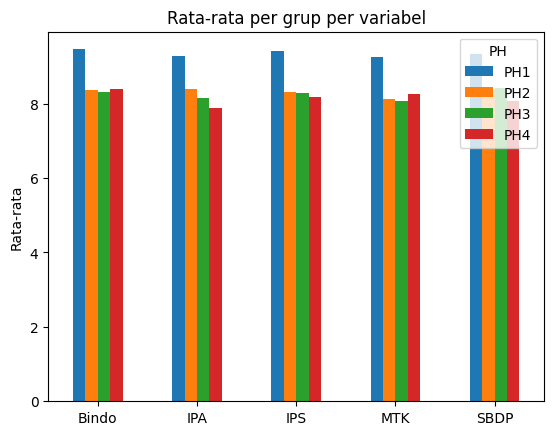

In [ ]:
#Visualisasi Data
data_trans_manova.groupby('PH')[['Bindo', 'IPA', 'IPS', 'MTK', 'SBDP']].mean().T.plot(kind='bar')
plt.title('Rata-rata per grup per variabel')
plt.ylabel('Rata-rata')
plt.xticks(rotation=0)
plt.show()